# **Waste Material Segregation for Improving Waste Management**

## **Objective**

The objective of this project is to implement an effective waste material segregation system using convolutional neural networks (CNNs) that categorises waste into distinct groups. This process enhances recycling efficiency, minimises environmental pollution, and promotes sustainable waste management practices.

The key goals are:

* Accurately classify waste materials into categories like cardboard, glass, paper, and plastic.
* Improve waste segregation efficiency to support recycling and reduce landfill waste.
* Understand the properties of different waste materials to optimise sorting methods for sustainability.

## **Data Understanding**

The Dataset consists of images of some common waste materials.

1. Food Waste
2. Metal
3. Paper
4. Plastic
5. Other
6. Cardboard
7. Glass


**Data Description**

* The dataset consists of multiple folders, each representing a specific class, such as `Cardboard`, `Food_Waste`, and `Metal`.
* Within each folder, there are images of objects that belong to that category.
* However, these items are not further subcategorised. <br> For instance, the `Food_Waste` folder may contain images of items like coffee grounds, teabags, and fruit peels, without explicitly stating that they are actually coffee grounds or teabags.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## **1. Load the data**

Load and unzip the dataset zip file.

**Import Necessary Libraries**

In [2]:
# Recommended versions:

# numpy version: 1.26.4
# pandas version: 2.2.2
# seaborn version: 0.13.2
# matplotlib version: 3.10.0
# PIL version: 11.1.0
# tensorflow version: 2.18.0
# keras version: 3.8.0
# sklearn version: 1.6.1

In [2]:
# Import essential libraries

# !pip install tensorflow==2.18.0
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from PIL import Image
import tensorflow as tf
from tensorflow import keras
import os
import zipfile
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import RandomFlip, RandomRotation, RandomZoom
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, BatchNormalization, Activation, MaxPooling2D, Dropout, Flatten, Dense

Load the dataset.

In [3]:
# Load and unzip the dataset

zip_path = '/content/drive/MyDrive/CNN_waste_management/data.zip'
extract_path = '/content/drive/MyDrive/CNN_waste_management/data'

# Extract the contents if not already extracted
if not os.path.exists(os.path.join(extract_path, "data")):
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        zip_ref.extractall(extract_path)
    print("Dataset successfully unzipped!")
else:
    print("Dataset is already unzipped.")

Dataset is already unzipped.


## **2. Data Preparation** <font color=red> [25 marks] </font><br>


### **2.1 Load and Preprocess Images** <font color=red> [8 marks] </font><br>

Let us create a function to load the images first. We can then directly use this function while loading images of the different categories to load and crop them in a single step.

#### **2.1.1** <font color=red> [3 marks] </font><br>
Create a function to load the images.

In [5]:
# # Create a function to load the raw images

# from tensorflow.keras.utils import load_img, img_to_array

# def load_raw_images(data_dir):
#     images = []
#     labels = []

#     for label, class_name in enumerate(sorted(os.listdir(data_dir))):
#         class_folder = os.path.join(data_dir, class_name)

#         for img_file in os.listdir(class_folder):
#             img_path = os.path.join(class_folder, img_file)

#             try:
#                 img = load_img(img_path)
#                 img_array = img_to_array(img)
#                 images.append(img_array)
#                 labels.append(label)
#             except Exception as e:
#                 print(f"Error loading {img_path}: {e}")

#     # Convert to numpy arrays
#     images = np.array(images, dtype='float32')
#     labels = np.array(labels, dtype='int32')

#     print(f"Loaded {len(images)} images from {len(set(labels))} classes.")
#     return images, labels

In [4]:
# Create a function to load the raw images

def load_image_dataset(data_dir, batch_size=32, val_split=0.2, seed=42):

    class_names = sorted([
    d for d in os.listdir(data_dir)
    if os.path.isdir(os.path.join(data_dir, d))])

    train_data = tf.keras.preprocessing.image_dataset_from_directory(
        data_dir,
        validation_split=val_split,
        subset="training",
        seed=seed,
        batch_size=batch_size,
        class_names=class_names
    )

    val_data = tf.keras.preprocessing.image_dataset_from_directory(
        data_dir,
        validation_split=val_split,
        subset="validation",
        seed=seed,
        batch_size=batch_size,
        class_names=class_names
    )

    return train_data, val_data

In [5]:
dir = '/content/drive/MyDrive/CNN_waste_management/data/data'
class_names = sorted(os.listdir(dir))

class_to_label_mapping = {name: i for i, name in enumerate(class_names)}
class_to_label_mapping

{'Cardboard': 0,
 'Food_Waste': 1,
 'Glass': 2,
 'Metal': 3,
 'Other': 4,
 'Paper': 5,
 'Plastic': 6}

In [6]:
# count of all images (train_data + val_data)

total_files = 0
for root, dirs, files in os.walk(dir):
    # Only count image files (e.g. .png); add other extensions if needed
    images = [f for f in files if f.lower().endswith('.png')]
    total_files += len(images)

print(f"Total images in raw data: {total_files}")

Total images in raw data: 7625


#### **2.1.2** <font color=red> [5 marks] </font><br>
Load images and labels.

Load the images from the dataset directory. Labels of images are present in the subdirectories.

Verify if the images and labels are loaded correctly.

In [7]:
# Get the images and their labels

train_data, val_data = load_image_dataset(dir)

print("Class mapping:", train_data.class_names)

Found 7625 files belonging to 7 classes.
Using 6100 files for training.
Found 7625 files belonging to 7 classes.
Using 1525 files for validation.
Class mapping: ['Cardboard', 'Food_Waste', 'Glass', 'Metal', 'Other', 'Paper', 'Plastic']


Perform any operations, if needed, on the images and labels to get them into the desired format.

In [8]:
# Shape of images and labels

for images, labels in train_data.take(1):
    print("Batch image shape:", images.shape)
    print("Batch label shape:", labels.shape)

Batch image shape: (32, 256, 256, 3)
Batch label shape: (32,)


In [9]:
for images, labels in train_data.take(15):
    print("Batch image shape:", images.shape)
    print("Batch label shape:", labels.shape)

Batch image shape: (32, 256, 256, 3)
Batch label shape: (32,)
Batch image shape: (32, 256, 256, 3)
Batch label shape: (32,)
Batch image shape: (32, 256, 256, 3)
Batch label shape: (32,)
Batch image shape: (32, 256, 256, 3)
Batch label shape: (32,)
Batch image shape: (32, 256, 256, 3)
Batch label shape: (32,)
Batch image shape: (32, 256, 256, 3)
Batch label shape: (32,)
Batch image shape: (32, 256, 256, 3)
Batch label shape: (32,)
Batch image shape: (32, 256, 256, 3)
Batch label shape: (32,)
Batch image shape: (32, 256, 256, 3)
Batch label shape: (32,)
Batch image shape: (32, 256, 256, 3)
Batch label shape: (32,)
Batch image shape: (32, 256, 256, 3)
Batch label shape: (32,)
Batch image shape: (32, 256, 256, 3)
Batch label shape: (32,)
Batch image shape: (32, 256, 256, 3)
Batch label shape: (32,)
Batch image shape: (32, 256, 256, 3)
Batch label shape: (32,)
Batch image shape: (32, 256, 256, 3)
Batch label shape: (32,)


In [10]:
for images, labels in train_data.take(1):
    print("Images:", images.dtype)
    print("Labels:", labels.dtype)

Images: <dtype: 'float32'>
Labels: <dtype: 'int32'>


### **2.2 Data Visualisation** <font color=red> [9 marks] </font><br>

#### **2.2.1** <font color=red> [3 marks] </font><br>
Create a bar plot to display the class distribution

In [11]:
# # Visualise Data Distribution

# unique_labels, counts = np.unique(labels, return_counts=True)

# plt.figure(figsize=(6,4))
# plt.bar([class_names[i] for i in unique_labels], counts)
# plt.xlabel('Classes')
# plt.ylabel('Number of Images')
# plt.title('Class Distribution in Dataset')
# plt.xticks(rotation=45)
# plt.tight_layout()
# plt.show()

In [12]:
# # Visualise Data Distribution

# class_names = train_data.class_names

# # Collect every label from the dataset into one 1D array
# all_labels = []
# for _, labels in train_data:
#     all_labels.extend(labels.numpy())

# # Unique label values and their counts
# unique_labels, counts = np.unique(all_labels, return_counts=True)

# plt.figure(figsize=(6,4))
# plt.bar([class_names[i] for i in unique_labels], counts)
# plt.xlabel('Classes')
# plt.ylabel('Number of Images')
# plt.title('Class Distribution in Dataset')
# plt.xticks(rotation=45, ha='right')
# plt.tight_layout()
# plt.show()

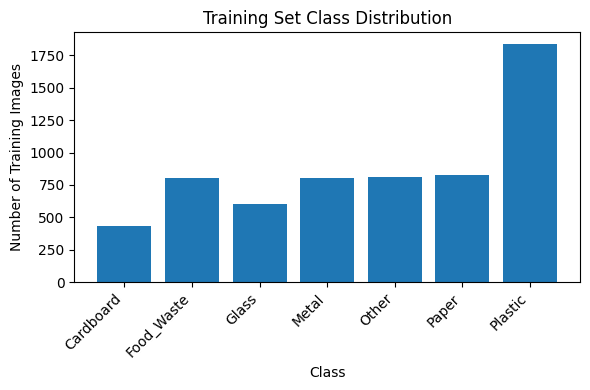

In [13]:
# Visualise Data Distribution

class_names = train_data.class_names
val_split = 0.2

counts = []
for cls in class_names:
    folder = os.path.join(dir, cls)
    total_files = len([
        f for f in os.listdir(folder)
        if os.path.isfile(os.path.join(folder, f))
    ])
    train_count = int(total_files * (1 - val_split))
    counts.append(train_count)

# 3) Plot
plt.figure(figsize=(6,4))
plt.bar(class_names, counts)
plt.xlabel('Class')
plt.ylabel('Number of Training Images')
plt.title('Training Set Class Distribution')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [14]:
# # Visualise Data Distribution

# class_names = train_data.class_names
# num_classes = len(class_names)

# def count_labels(dataset, num_classes):
#     def count_batch(_, labels):
#         return tf.reduce_sum(tf.one_hot(labels, depth=num_classes, dtype=tf.int32), axis=0)

#     initial = tf.zeros([num_classes], dtype=tf.int32)
#     return dataset.map(count_batch).reduce(initial, tf.add).numpy()

# # Get value counts from train_data
# counts = count_labels(train_data, num_classes)

# # Plot
# plt.figure(figsize=(6, 4))
# plt.bar(class_names, counts)
# plt.xlabel('Class')
# plt.ylabel('Number of Training Images')
# plt.title('Training Set Class Distribution (Fast)')
# plt.xticks(rotation=45, ha='right')
# plt.tight_layout()
# plt.show()

#### **2.2.2** <font color=red> [3 marks] </font><br>
Visualise some sample images

In [15]:
# # Visualise Sample Images (across different labels)

# import random

# plt.figure(figsize=(12, 12))
# for i in range(16):
#     index = random.randint(0, len(images) - 1)
#     plt.subplot(4, 4, i+1)
#     plt.imshow(images[index].astype("uint8"))
#     plt.title(f"Label: {labels[index]}")
#     plt.axis("off")
# plt.show()

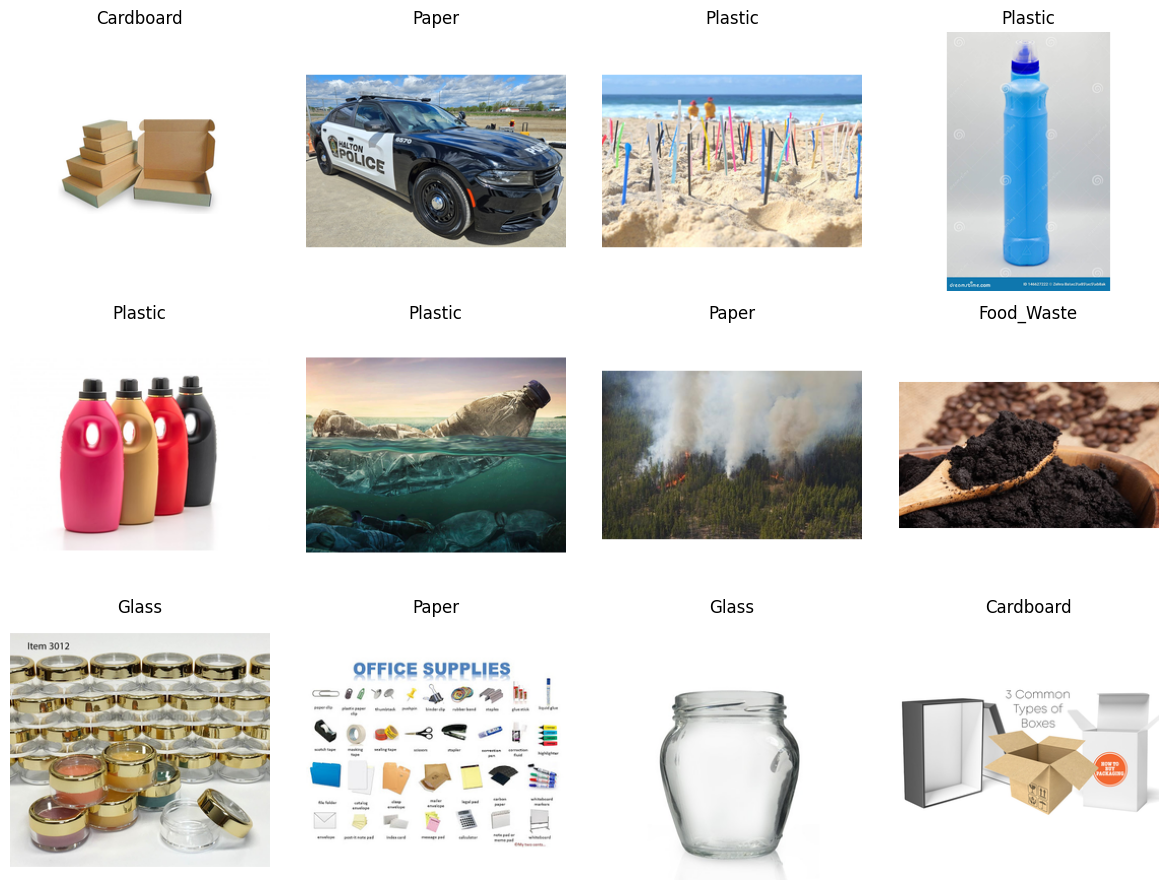

In [16]:
# Visualise Sample Images (across different labels)

import random

# Grab the first batch from train_data
it = iter(train_data)
batch_images, batch_labels = next(it)

plt.figure(figsize=(12,9))
for i, idx in enumerate(random.sample(range(batch_images.shape[0]), 12)):
    ax = plt.subplot(3,4,i+1)

    img = batch_images[idx]
    img_to_show = img.numpy().astype('uint8')

    plt.imshow(img_to_show)
    lbl = train_data.class_names[int(batch_labels[idx])]
    plt.title(lbl)
    plt.axis('off')

plt.tight_layout()
plt.show()

#### **2.2.3** <font color=red> [3 marks] </font><br>
Based on the smallest and largest image dimensions, resize the images.

In [17]:
# Find the smallest and largest image dimensions from the data set

def find_min_max_dimensions(data_dir):

    min_w, min_h = float('inf'), float('inf')
    max_w, max_h = 0, 0

    for root, _, files in os.walk(data_dir):
        for fname in files:
            if not fname.lower().endswith('.png'):
                continue
            fpath = os.path.join(root, fname)

            try:
                with Image.open(fpath) as img:
                    w, h = img.size
                # Update mins
                if w < min_w: min_w = w
                if h < min_h: min_h = h
                # Update maxes
                if w > max_w: max_w = w
                if h > max_h: max_h = h
            except Exception:
                pass

    return (min_w, min_h), (max_w, max_h)


(min_w, min_h), (max_w, max_h) = find_min_max_dimensions(dir)
print(f"Smallest dimension: {min_w}×{min_h}")
print(f"Largest  dimension: {max_w}×{max_h}")

Smallest dimension: 256×256
Largest  dimension: 256×256


In [18]:
# Resize the image dimensions

# All the images are of same size, so no need to resize them.

### **2.3 Encoding the classes** <font color=red> [3 marks] </font><br>

There are seven classes present in the data.

We have extracted the images and their labels, and visualised their distribution. Now, we need to perform encoding on the labels. Encode the labels suitably.

####**2.3.1** <font color=red> [3 marks] </font><br>
Encode the target class labels.

In [11]:
# Encode the labels suitably

num_classes = len(train_data.class_names)

# Convert train_data to one-hot labels
train_data_encoded = train_data.map(
    lambda imgs, lbls: (imgs, tf.one_hot(lbls, depth=num_classes))
)

# Convert val_data to one-hot labels
val_data_encoded = val_data.map(
    lambda imgs, lbls: (imgs, tf.one_hot(lbls, depth=num_classes))
)

In [20]:
# Validate encoded labels

# Take one batch from train_data_encoded
for imgs, one_hot_labels in train_data_encoded.take(1):
    print("One-hot labels shape:", one_hot_labels.shape)
    print("First 5 one-hot vectors:\n", one_hot_labels.numpy()[:5])

    # Convert back to integer labels to verify
    recovered_ints = tf.argmax(one_hot_labels, axis=1).numpy()
    print("Recovered integer labels:", recovered_ints[:5])
    break

One-hot labels shape: (32, 7)
First 5 one-hot vectors:
 [[0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1. 0.]
 [1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0.]]
Recovered integer labels: [1 5 5 0 1]


### **2.4 Data Splitting** <font color=red> [5 marks] </font><br>

#### **2.4.1** <font color=red> [5 marks] </font><br>
Split the dataset into training and validation sets

In [21]:
# Assign specified parts of the dataset to train and validation sets

# We have already split the data while loading image dataset, so no need to split here.

## **3. Model Building and Evaluation** <font color=red> [20 marks] </font><br>

### **3.1 Model building and training** <font color=red> [15 marks] </font><br>

#### **3.1.1** <font color=red> [10 marks] </font><br>
Build and compile the model. Use 3 convolutional layers. Add suitable normalisation, dropout, and fully connected layers to the model.

Test out different configurations and report the results in conclusions.

In [22]:
# Build and compile the model

# Build the model
model = Sequential([
    # 1st conv block
    Conv2D(32, (3, 3), input_shape=(256, 256, 3)),
    BatchNormalization(),
    Activation('relu'),
    MaxPooling2D((2, 2)),
    Dropout(0.25),

    # 2nd conv block
    Conv2D(64, (3, 3)),
    BatchNormalization(),
    Activation('relu'),
    MaxPooling2D((2, 2)),
    Dropout(0.25),

    # 3rd conv block
    Conv2D(128, (3, 3)),
    BatchNormalization(),
    Activation('relu'),
    MaxPooling2D((2, 2)),
    Dropout(0.25),

    # Fully connected layer
    Flatten(),
    Dense(256),
    BatchNormalization(),
    Activation('relu'),
    Dropout(0.5),

    # Output layer
    Dense(7, activation='softmax')
])

# Compile the model
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 254, 254, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 254, 254, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 254, 254, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 125, 125, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 125, 125, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 125, 125, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 60, 60, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 60, 60, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 60, 60, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 30, 30, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 30, 30, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 115200)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │    29,491,456 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 7)              │         1,799 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 29,588,423 (112.87 MB)

 Trainable params: 29,587,463 (112.87 MB)

 Non-trainable params: 960 (3.75 KB)

#### **3.1.2** <font color=red> [5 marks] </font><br>
Train the model.

Use appropriate metrics and callbacks as needed.

Epoch 1/15
191/191 ━━━━━━━━━━━━━━━━━━━━ 50s 187ms/step - accuracy: 0.3150 - loss: 2.0287 - val_accuracy: 0.4321 - val_loss: 1.6169
Epoch 2/15
191/191 ━━━━━━━━━━━━━━━━━━━━ 63s 145ms/step - accuracy: 0.4817 - loss: 1.4390 - val_accuracy: 0.3803 - val_loss: 2.1541
Epoch 3/15
191/191 ━━━━━━━━━━━━━━━━━━━━ 40s 141ms/step - accuracy: 0.5623 - loss: 1.2229 - val_accuracy: 0.4085 - val_loss: 1.7483
Epoch 4/15
191/191 ━━━━━━━━━━━━━━━━━━━━ 27s 144ms/step - accuracy: 0.6452 - loss: 1.0117 - val_accuracy: 0.4085 - val_loss: 1.7560
Epoch 5/15
191/191 ━━━━━━━━━━━━━━━━━━━━ 28s 144ms/step - accuracy: 0.7172 - loss: 0.8213 - val_accuracy: 0.4485 - val_loss: 1.6999
Epoch 6/15
191/191 ━━━━━━━━━━━━━━━━━━━━ 27s 139ms/step - accuracy: 0.7864 - loss: 0.6344 - val_accuracy: 0.5554 - val_loss: 1.2802
Epoch 7/15
191/191 ━━━━━━━━━━━━━━━━━━━━ 42s 142ms/step - accuracy: 0.8330 - loss: 0.5013 - val_accuracy: 0.5102 - val_loss: 1.6514
Epoch 8/15
191/191 ━━━━━━━━━━━━━━━━━━━━ 28s 147ms/step - accuracy: 0.8753 - loss: 0

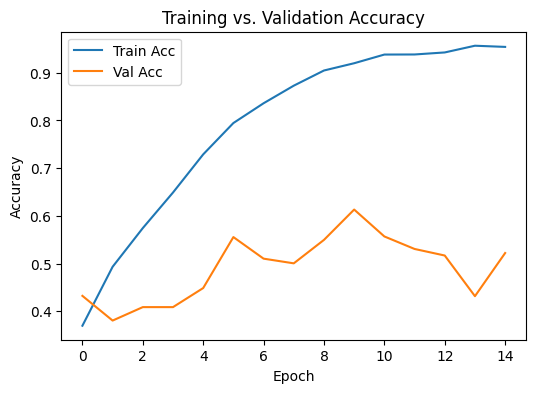

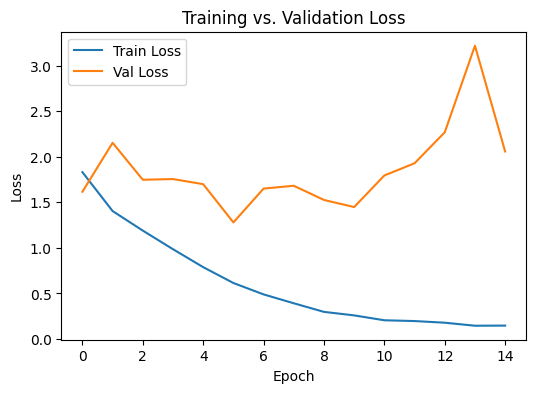

In [23]:
# Training

epochs = 15

history = model.fit(
    train_data_encoded,    # one-hot labels
    validation_data=val_data_encoded,
    epochs=epochs
)

# Accuracy
plt.figure(figsize=(6,4))
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training vs. Validation Accuracy')
plt.show()

# Loss
plt.figure(figsize=(6,4))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training vs. Validation Loss')
plt.show()

Training accuracy is very high (95%) and validation accuracy is very low (52%) which is a sign of overfitting.

We will use Data Augmentation

In [24]:
# Image Augmentation
from tensorflow.keras.layers import RandomFlip, RandomRotation, RandomZoom

# Build an augmentation block
augmenter = Sequential([
    RandomFlip("horizontal"),
    RandomRotation(0.1),
    RandomZoom(0.1),
], name="data_augmentation")

# Rebuild your model, prepending augmentation
model = Sequential([
    augmenter,

    Conv2D(32, (3,3), input_shape=(256,256,3)),
    BatchNormalization(),
    Activation('relu'),
    MaxPooling2D(),
    Dropout(0.25),

    Conv2D(64, (3,3)),
    BatchNormalization(),
    Activation('relu'),
    MaxPooling2D(),
    Dropout(0.25),

    Conv2D(128, (3,3)),
    BatchNormalization(),
    Activation('relu'),
    MaxPooling2D(),
    Dropout(0.25),

    Flatten(),
    Dense(256),
    BatchNormalization(),
    Activation('relu'),
    Dropout(0.5),
    Dense(7, activation='softmax')
])

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


In [25]:
# Training the data from augmentation

history = model.fit(
    train_data_encoded,
    validation_data=val_data_encoded,
    epochs=12
)

Epoch 1/12
191/191 ━━━━━━━━━━━━━━━━━━━━ 55s 231ms/step - accuracy: 0.2904 - loss: 2.0613 - val_accuracy: 0.3633 - val_loss: 1.7284
Epoch 2/12
191/191 ━━━━━━━━━━━━━━━━━━━━ 43s 225ms/step - accuracy: 0.4263 - loss: 1.5990 - val_accuracy: 0.2354 - val_loss: 2.3482
Epoch 3/12
191/191 ━━━━━━━━━━━━━━━━━━━━ 87s 253ms/step - accuracy: 0.4529 - loss: 1.4772 - val_accuracy: 0.4616 - val_loss: 1.4853
Epoch 4/12
191/191 ━━━━━━━━━━━━━━━━━━━━ 77s 227ms/step - accuracy: 0.4858 - loss: 1.4205 - val_accuracy: 0.4236 - val_loss: 1.6252
Epoch 5/12
191/191 ━━━━━━━━━━━━━━━━━━━━ 43s 223ms/step - accuracy: 0.5065 - loss: 1.3607 - val_accuracy: 0.4538 - val_loss: 1.4849
Epoch 6/12
191/191 ━━━━━━━━━━━━━━━━━━━━ 43s 226ms/step - accuracy: 0.5176 - loss: 1.3177 - val_accuracy: 0.5089 - val_loss: 1.3628
Epoch 7/12
191/191 ━━━━━━━━━━━━━━━━━━━━ 49s 253ms/step - accuracy: 0.5226 - loss: 1.2865 - val_accuracy: 0.4426 - val_loss: 1.4740
Epoch 8/12
191/191 ━━━━━━━━━━━━━━━━━━━━ 76s 223ms/step - accuracy: 0.5441 - loss: 1

Now overfitting has been removed using image augmentation but still training and validation accuracy is not good which is around 55-60% currently.

We will try to use transfer learning now

In [12]:
# Transfer Learninng using pretrained model MobileNetV2 based on ImageNet

from tensorflow.keras.layers import GlobalAveragePooling2D

# Load pretrained base model
base_model = tf.keras.applications.MobileNetV2(
    input_shape=(256, 256, 3),
    include_top=False,
    weights='imagenet'
)

# Freeze all layers
base_model.trainable = False  # freeze all layers

# Build new model
model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(256),
    BatchNormalization(),
    Activation('relu'),
    Dropout(0.5),
    Dense(7, activation='softmax')
])

# Compile
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()

<ipython-input-12-304e3c950afd>:6: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = tf.keras.applications.MobileNetV2(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_224            │ (None, 8, 8, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       327,936 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 7)              │         1,799 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,588,743 (9.88 MB)

 Trainable params: 330,247 (1.26 MB)

 Non-trainable params: 2,258,496 (8.62 MB)

In [13]:
# Train the model with augmented data
EPOCHS = 12
history = model.fit(
    train_data_encoded,
    validation_data=val_data_encoded,
    epochs=EPOCHS
)

Epoch 1/12
191/191 ━━━━━━━━━━━━━━━━━━━━ 51s 205ms/step - accuracy: 0.3930 - loss: 1.7585 - val_accuracy: 0.5600 - val_loss: 1.2054
Epoch 2/12
191/191 ━━━━━━━━━━━━━━━━━━━━ 32s 165ms/step - accuracy: 0.5947 - loss: 1.1438 - val_accuracy: 0.6098 - val_loss: 1.0769
Epoch 3/12
191/191 ━━━━━━━━━━━━━━━━━━━━ 29s 150ms/step - accuracy: 0.6497 - loss: 1.0016 - val_accuracy: 0.6216 - val_loss: 1.0754
Epoch 4/12
191/191 ━━━━━━━━━━━━━━━━━━━━ 40s 144ms/step - accuracy: 0.6826 - loss: 0.8919 - val_accuracy: 0.6328 - val_loss: 1.0320
Epoch 5/12
191/191 ━━━━━━━━━━━━━━━━━━━━ 28s 147ms/step - accuracy: 0.7097 - loss: 0.8182 - val_accuracy: 0.6203 - val_loss: 1.0398
Epoch 6/12
191/191 ━━━━━━━━━━━━━━━━━━━━ 41s 149ms/step - accuracy: 0.7268 - loss: 0.7650 - val_accuracy: 0.6511 - val_loss: 0.9765
Epoch 7/12
191/191 ━━━━━━━━━━━━━━━━━━━━ 40s 143ms/step - accuracy: 0.7625 - loss: 0.6937 - val_accuracy: 0.6380 - val_loss: 1.0403
Epoch 8/12
191/191 ━━━━━━━━━━━━━━━━━━━━ 47s 175ms/step - accuracy: 0.7691 - loss: 0

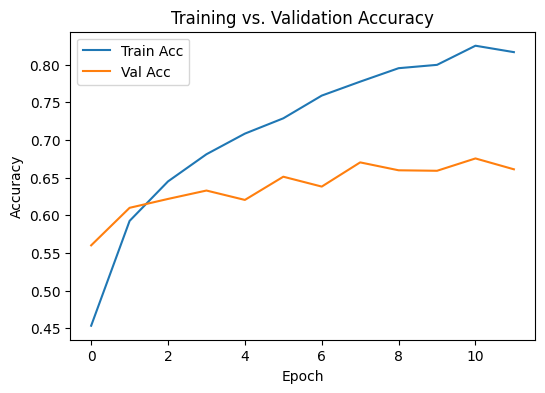

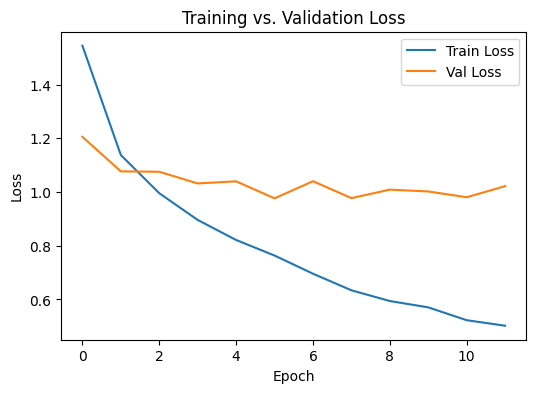

In [14]:
# Accuracy
plt.figure(figsize=(6,4))
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training vs. Validation Accuracy')
plt.show()

# Loss
plt.figure(figsize=(6,4))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training vs. Validation Loss')
plt.show()

The above model gave a decent accuracy for training and validation set. In this model we freeze all the layers of base model except last layer and add some more layers. Traning accuracy goes up on each epoch, validation accuracy also goes up but to a certain limit which is around 66%.

Now we can try with **same pretrained model but with freezing some of the layers only** and slower learning rate.

In [15]:
# from tensorflow.keras.layers import GlobalAveragePooling2D

# Load pretrained base model
base_model = tf.keras.applications.MobileNetV2(
    input_shape=(256, 256, 3),
    include_top=False,
    weights='imagenet'
)

base_model.trainable = True

# Freeze all except the last few layers
for layer in base_model.layers[:-30]:
    layer.trainable = False

# Build new model
model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(256),
    BatchNormalization(),
    Activation('relu'),
    Dropout(0.5),
    Dense(7, activation='softmax')
])

# Compile
model.compile(
    optimizer=tf.keras.optimizers.Adam(1e-5), #slower learning rate
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()

<ipython-input-15-71b5c7f3d4e7>:4: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = tf.keras.applications.MobileNetV2(


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_224            │ (None, 8, 8, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_1      │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │       327,936 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 7)              │         1,799 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,588,743 (9.88 MB)

 Trainable params: 1,856,647 (7.08 MB)

 Non-trainable params: 732,096 (2.79 MB)

In [16]:
fine_history = model.fit(
    train_data_encoded,
    validation_data=val_data_encoded,
    epochs=20
)

Epoch 1/20
191/191 ━━━━━━━━━━━━━━━━━━━━ 60s 215ms/step - accuracy: 0.1780 - loss: 2.4548 - val_accuracy: 0.0970 - val_loss: 2.5336
Epoch 2/20
191/191 ━━━━━━━━━━━━━━━━━━━━ 31s 161ms/step - accuracy: 0.3050 - loss: 1.9459 - val_accuracy: 0.1580 - val_loss: 2.3450
Epoch 3/20
191/191 ━━━━━━━━━━━━━━━━━━━━ 41s 161ms/step - accuracy: 0.3883 - loss: 1.6779 - val_accuracy: 0.2584 - val_loss: 2.0518
Epoch 4/20
191/191 ━━━━━━━━━━━━━━━━━━━━ 37s 141ms/step - accuracy: 0.4721 - loss: 1.4895 - val_accuracy: 0.3587 - val_loss: 1.8086
Epoch 5/20
191/191 ━━━━━━━━━━━━━━━━━━━━ 41s 140ms/step - accuracy: 0.5150 - loss: 1.3789 - val_accuracy: 0.4249 - val_loss: 1.6251
Epoch 6/20
191/191 ━━━━━━━━━━━━━━━━━━━━ 42s 144ms/step - accuracy: 0.5657 - loss: 1.2357 - val_accuracy: 0.4905 - val_loss: 1.4675
Epoch 7/20
191/191 ━━━━━━━━━━━━━━━━━━━━ 46s 169ms/step - accuracy: 0.5800 - loss: 1.1680 - val_accuracy: 0.5318 - val_loss: 1.3434
Epoch 8/20
191/191 ━━━━━━━━━━━━━━━━━━━━ 40s 166ms/step - accuracy: 0.6086 - loss: 1

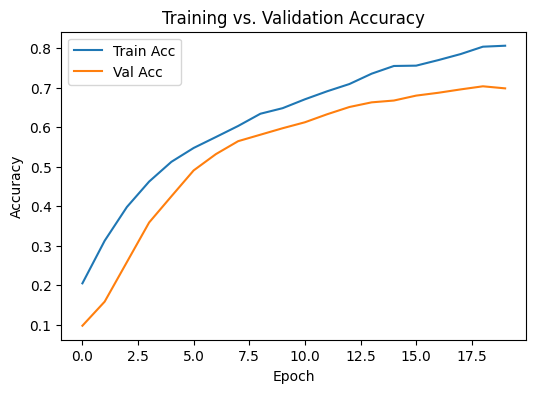

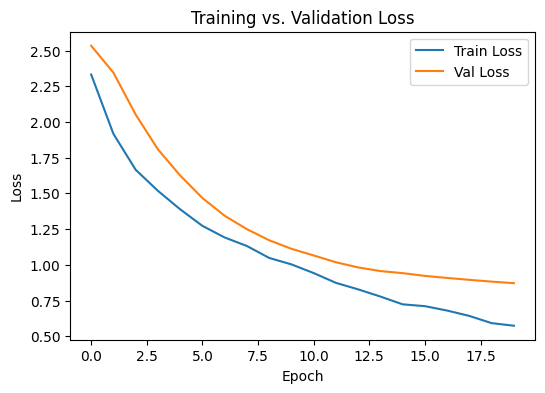

In [17]:
# Accuracy
plt.figure(figsize=(6,4))
plt.plot(fine_history.history['accuracy'], label='Train Acc')
plt.plot(fine_history.history['val_accuracy'], label='Val Acc')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training vs. Validation Accuracy')
plt.show()

# Loss
plt.figure(figsize=(6,4))
plt.plot(fine_history.history['loss'], label='Train Loss')
plt.plot(fine_history.history['val_loss'], label='Val Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training vs. Validation Loss')
plt.show()

This model is definitely giving us **better results**, good training accuracy, good validation accuracy, no overfitting. <Br>
We used MobileNetV2 pretrained model which is faster and gives decent accuracy. We freezed starting layers and made last 30 layers trainable, and add our own layers such as GlobalAveragePooling, BatchNormalization, Relu activation and Dense layer for 7 classes. <Br>
**We will go ahead with this model.**

### **3.2 Model Testing and Evaluation** <font color=red> [5 marks] </font><br>

#### **3.2.1** <font color=red> [5 marks] </font><br>
Evaluate the model on test dataset. Derive appropriate metrics.

48/48 ━━━━━━━━━━━━━━━━━━━━ 5s 102ms/step - accuracy: 0.7072 - loss: 0.8630
Val   loss: 0.8714
Val accuracy: 69.8361%

48/48 ━━━━━━━━━━━━━━━━━━━━ 12s 182ms/step
Classification Report:

              precision    recall  f1-score   support

   Cardboard     0.0460    0.0435    0.0447        92
  Food_Waste     0.1458    0.1538    0.1497       182
       Glass     0.1120    0.0892    0.0993       157
       Metal     0.1905    0.1495    0.1675       214
       Other     0.1095    0.1106    0.1100       208
       Paper     0.1481    0.1308    0.1390       214
     Plastic     0.3014    0.3646    0.3300       458

    accuracy                         0.1941      1525
   macro avg     0.1505    0.1489    0.1486      1525
weighted avg     0.1847    0.1941    0.1879      1525



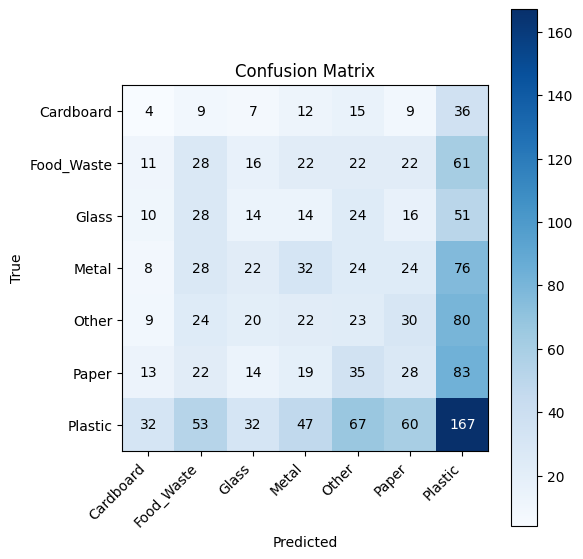

In [18]:
# Evaluate on the test set; display suitable metrics

from sklearn.metrics import classification_report, confusion_matrix

class_names = val_data.class_names  # or train_data.class_names

# Overall evaluation
val_loss, val_acc = model.evaluate(val_data_encoded, verbose=1)
print(f"Val   loss: {val_loss:.4f}")
print(f"Val accuracy: {val_acc:.4%}\n")

# Gather true & predicted labels
y_true = np.concatenate([y.numpy() for _, y in val_data_encoded], axis=0)
y_true = np.argmax(y_true, axis=1)

y_pred = np.argmax(model.predict(val_data_encoded), axis=1)

# Classification report
print("Classification Report:\n")
print(classification_report(y_true, y_pred, target_names=class_names, digits=4))

# Confusion matrix
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(6,6))
plt.imshow(cm, cmap='Blues', interpolation='nearest')
plt.title("Confusion Matrix")
plt.colorbar()
ticks = np.arange(len(class_names))
plt.xticks(ticks, class_names, rotation=45, ha='right')
plt.yticks(ticks, class_names)
for i in range(len(class_names)):
    for j in range(len(class_names)):
        plt.text(j, i, cm[i, j],
                 ha='center',
                 va='center',
                 color='white' if cm[i,j] > cm.max()/2 else 'black')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.tight_layout()
plt.show()

## **4. Data Augmentation** <font color=red> [optional] </font><br>

#### **4.1 Create a Data Augmentation Pipeline**

##### **4.1.1**
Define augmentation steps for the datasets.

In [ ]:
# Define augmentation steps to augment images



Augment and resample the images.
In case of class imbalance, you can also perform adequate undersampling on the majority class and augment those images to ensure consistency in the input datasets for both classes.

Augment the images.

In [ ]:
# Create a function to augment the images




In [ ]:
# Create the augmented training dataset



##### **4.1.2**

Train the model on the new augmented dataset.

In [ ]:
# Train the model using augmented images



## **5. Conclusions** <font color = red> [5 marks]</font>

#### **5.1 Conclude with outcomes and insights gained** <font color =red> [5 marks] </font>

* Report your findings about the data
* Report model training results

Seven waste categories - Cardboard, Food_Waste, Glass, Metal, Other, Paper, Plastic. <Br>

Class imbalance is severe: “Plastic” images outnumber all other classes combined.<Br>

**Model Training:**<Br>

Used Transfer Learning.<Br>

Used Pretrained MobileNetV2 + GlobalAveragePooling + Dense head.<Br>

Fine tuned last 30 layers of pretrained model.<Br>

Used slower learning rate = 1e-5, BatchNorm, Dropout(0.5) in the head.<Br>

Used Adam optimizer and categorical cross-entropy loss.<Br>


**Model Performance:**<Br>

Training accuracy rose to 82% by epoch 20.<Br>

Validation accuracy steadily improved to 71.3%.<Br>

No overfitting.<Br>

Confusion matrix & classification report reveal that high-frequency classes (Plastic) are learned well, but low-frequency classes (Cardboard, Glass, Other) have poor recall/precision (F1 = 0.10 – 0.18).<Br>


**Recommendations:**<Br>

We can Oversample minority classes or undersample the dominant class to deal with class imbalance issue.<Br>

More hyperparameter tuning or we can use any other pretrained model.<Br>





